In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [4]:
glm = LogisticRegression()
glm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [5]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=144, shuffle=True, stratify=Y) 

In [7]:
glm.set_params(max_iter = 10000)
glm.fit(X_train, Y_train)
r2_train = np.round(glm.score(X_train, Y_train),3)
r2_test  = np.round(glm.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.647
Test score is :0.668


In [8]:
c_param = [10.0**i for i in np.arange(-5,5,1)]
class_weight = ['auto','balanced']
penalty = ['l1', 'l2','none']
solver = ["newton-cg", "sag", "saga", "lbfgs"]
warm_start = True

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
glm = LogisticRegression()
glm.set_params(warm_start = True, max_iter = 1e4)
grid_param = {'C':c_param, 'class_weight' : class_weight, 'penalty':penalty, 'solver':solver}
glm_cv = GridSearchCV(glm, grid_param, cv = 3, return_train_score = True)
%time glm_cv.fit(X_train, Y_train)

CPU times: total: 5min 27s
Wall time: 5min 28s


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000.0, warm_start=True),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0],
                         'class_weight': ['auto', 'balanced'],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             return_train_score=True)

In [11]:
glm_df = pd.DataFrame(data = glm_cv.cv_results_)

In [12]:
glm_df.dropna(axis=0, how = 'any', inplace=True)

In [13]:
glm_df.shape

(90, 20)

In [14]:
glm_final_df = glm_df.loc[:,['param_C','param_class_weight','param_penalty','param_solver','mean_train_score',
                            'mean_test_score']]
glm_final_df.sample(5)

,param_C,param_class_weight,param_penalty,param_solver,mean_train_score,mean_test_score
185,100.0,balanced,l2,sag,0.622382,0.549741
165,10.0,balanced,none,sag,0.620312,0.553908
234,10000.0,balanced,l2,saga,0.609940,0.543517
206,1000.0,balanced,l1,saga,0.609940,0.543517
47,0.0001,balanced,none,lbfgs,0.632750,0.549767


In [ ]:
#np.max(glm_final_df.mean_train_score)

In [ ]:
#np.max(glm_final_df.mean_test_score)

In [ ]:
#np.unique(glm_final_df.param_class_weight)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_classifier = SGDClassifier()

In [17]:
sgd_classifier.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [18]:
sgd_classifier.set_params(alpha = 1, max_iter = 10000, random_state = 144)
sgd_classifier.fit(X_train, Y_train)
r2_train = np.round(sgd_classifier.score(X_train, Y_train),3)
r2_test  = np.round(sgd_classifier.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.465
Test score is :0.416


In [19]:
alpha = [10.0**i for i in np.arange(-5,5,1)]
class_weight = ['auto','balanced']
penalty = ['l1', 'l2','elasticnet']
loss = ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber',
       'epsilon_insensitive', 'squared_epsilon_insensitive']

In [20]:
param_grid = {'alpha':alpha, 'class_weight':class_weight, 'penalty':penalty, 'loss':loss}
sgd_grid = SGDClassifier()
sgd_classifier_cv = GridSearchCV(sgd_grid, param_grid, cv = 3 , return_train_score=True)
%time sgd_classifier_cv.fit(X_train, Y_train)

CPU times: total: 16.4 s
Wall time: 16.4 s


GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0],
                         'class_weight': ['auto', 'balanced'],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge', 'perceptron',
                                  'squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True)

In [21]:
sgd_df = pd.DataFrame(sgd_classifier_cv.cv_results_)
sgd_df.shape

(600, 20)

In [22]:
sgd_df.dropna(axis=0, how = 'any', inplace=True)

In [23]:
sgd_df.shape

(270, 20)

In [24]:
sgd_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_class_weight', 'param_loss', 'param_penalty',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [25]:
sgd_final_df = sgd_df.loc[:,['param_penalty','param_class_weight','param_penalty','param_loss','mean_train_score',
                            'mean_test_score']]
sgd_final_df.sample(5)

,param_penalty,param_class_weight,param_penalty,param_loss,mean_train_score,mean_test_score
478,l2,balanced,l2,squared_epsilon_insensitive,0.225050,0.211581
392,elasticnet,balanced,elasticnet,hinge,0.359039,0.367055
341,elasticnet,balanced,elasticnet,modified_huber,0.200996,0.187125
218,elasticnet,balanced,elasticnet,log,0.411654,0.379891
234,l1,balanced,l1,epsilon_insensitive,0.064302,0.056017


In [26]:
sgd_final_df['diff'] = sgd_final_df.mean_train_score - sgd_final_df.mean_test_score
sgd_final_df.sample(10)

,param_penalty,param_class_weight,param_penalty,param_loss,mean_train_score,mean_test_score,diff
585,l1,balanced,l1,perceptron,0.292741,0.294177,-0.001436
536,elasticnet,balanced,elasticnet,epsilon_insensitive,0.222958,0.224198,-0.001240
216,l1,balanced,l1,log,0.428259,0.396597,0.031662
288,l1,balanced,l1,squared_error,0.207597,0.207182,0.000416
52,l2,balanced,l2,huber,0.133931,0.144979,-0.011049
236,elasticnet,balanced,elasticnet,epsilon_insensitive,0.072593,0.074741,-0.002148
510,l1,balanced,l1,hinge,0.223996,0.222127,0.001869
413,elasticnet,balanced,elasticnet,huber,0.221064,0.250841,-0.029777
43,l2,balanced,l2,squared_hinge,0.539441,0.535210,0.004231
271,l2,balanced,l2,hinge,0.210758,0.205047,0.005711


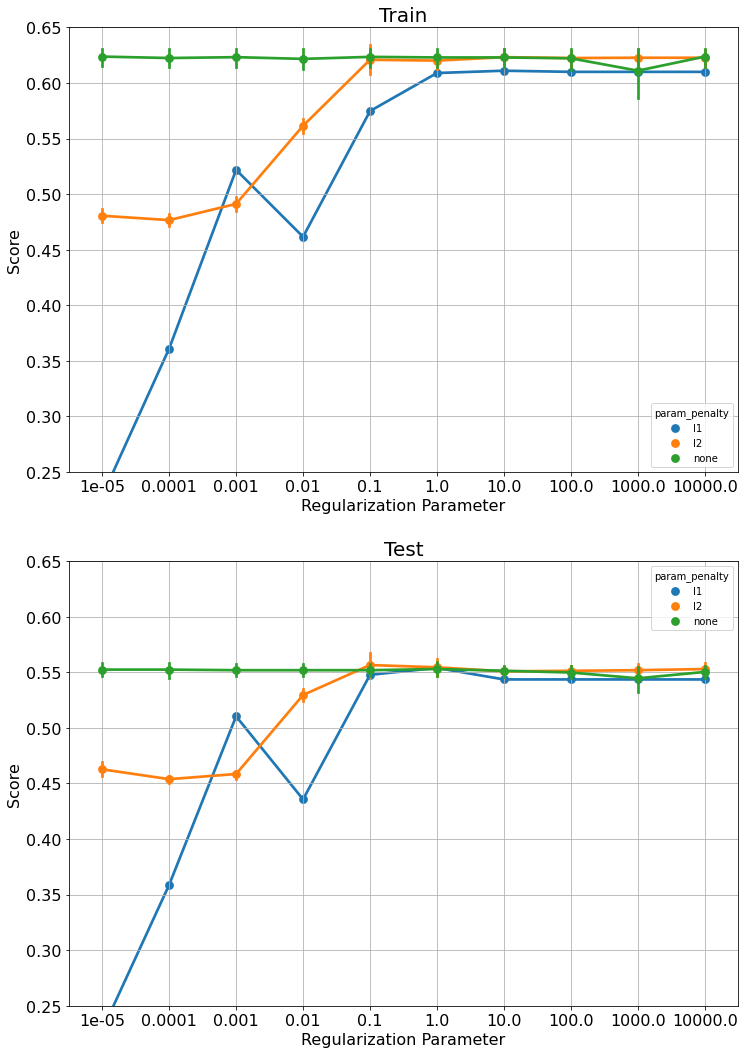

In [27]:
fig, ax = plt.subplots(2,1, figsize = (12,18))

sns.pointplot(data = glm_final_df, x = 'param_C', y = 'mean_train_score', ax = ax[0], hue = 'param_penalty', 
                 s = 120, label = 'Train')
sns.pointplot(data = glm_final_df, x = 'param_C', y = 'mean_test_score', ax = ax[1], hue = 'param_penalty', 
                 s = 120, label = 'Test')

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Regularization Parameter', fontsize= 16)
ax[0].set_ylabel('Score', fontsize= 16)
ax[0].grid()
ax[0].set_title('Train', fontsize = 20)
ax[0]. set_ylim([0.25, 0.65])

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Regularization Parameter', fontsize= 16)
ax[1].set_ylabel('Score', fontsize= 16)
ax[1].grid()
ax[1].set_title('Test', fontsize = 20)
ax[1]. set_ylim([0.25, 0.65]);

In [28]:
glm = LogisticRegression()
glm.set_params(max_iter = 10000)
glm.fit(X_train, Y_train)
r2_train = np.round(glm.score(X_train, Y_train),3)
r2_test  = np.round(glm.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

Train score is :0.647
Test score is :0.668


In [29]:
train_prob = glm.predict_proba(X_train)
train_prob.shape

(482, 5)

In [30]:
train_prob[:5,:]

array([[1.21079359e-01, 7.80060698e-01, 6.57367469e-02, 2.86513012e-02,
        4.47189465e-03],
       [3.74219623e-01, 4.73323703e-01, 1.29917988e-01, 1.98962410e-02,
        2.64244494e-03],
       [2.05034018e-02, 1.88949985e-01, 1.27346520e-01, 2.56189623e-01,
        4.07010470e-01],
       [1.78826870e-01, 6.96055428e-01, 7.32258793e-02, 4.36793427e-02,
        8.21247948e-03],
       [9.50425973e-01, 4.64610049e-02, 2.73704564e-03, 3.59860623e-04,
        1.61156848e-05]])

In [31]:
glm.decision_function(X_train)[:5,:]

array([[ 0.69754878,  2.56047433,  0.08676067, -0.74369855, -2.60108523],
       [ 1.74209062,  1.97702728,  0.68415115, -1.19222142, -3.21104763],
       [-1.91215755,  0.30873398, -0.08583649,  0.61316952,  1.07609054],
       [ 0.80483283,  2.163844  , -0.0880364 , -0.60471002, -2.27593041],
       [ 5.54642988,  2.52813296, -0.30360129, -2.33251888, -5.43844267]])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
Y_train_pred = glm.predict(X_train)
Y_test_pred = glm.predict(X_test)

In [34]:
conf_data_train = confusion_matrix(Y_train,Y_train_pred)
conf_data_test  = confusion_matrix(Y_test,Y_test_pred)

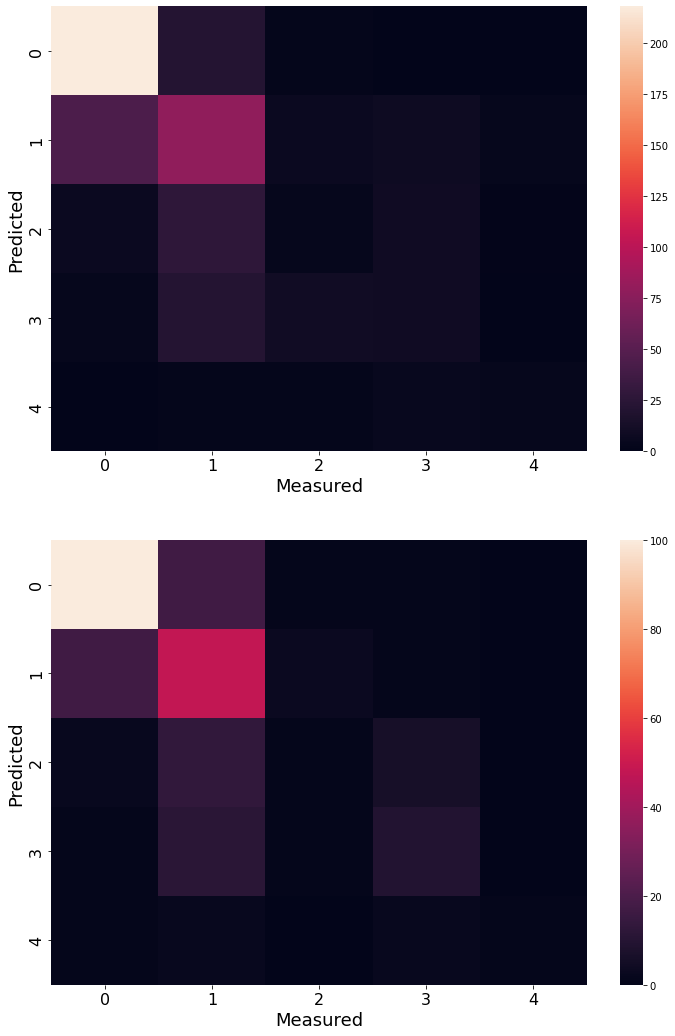

In [35]:
fig, ax = plt.subplots(2,1,figsize= (12,18))
sns.heatmap(conf_data_train, ax = ax[0])
sns.heatmap(conf_data_test,  ax = ax[1])

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18);

In [36]:
conf_data_train

array([[218,  21,   2,   0,   0],
       [ 44,  79,   6,   8,   3],
       [  6,  27,   3,   9,   1],
       [  3,  21,  10,   9,   0],
       [  0,   2,   2,   5,   3]], dtype=int64)

In [37]:
conf_data_test

array([[100,  17,   1,   1,   0],
       [ 17,  48,   3,   1,   0],
       [  2,  13,   1,   6,   0],
       [  1,  11,   1,   9,   0],
       [  1,   2,   0,   2,   1]], dtype=int64)

In [38]:
print('Type 1 percent is :' + str(np.round(100 * Y[Y==0].shape[0]/Y.shape[0],2)) + '%')
print('Type 2 percent is :' + str(np.round(100 * Y[Y==1].shape[0]/Y.shape[0],2)) + '%')
print('Type 3 percent is :' + str(np.round(100 * Y[Y==2].shape[0]/Y.shape[0],2)) + '%')
print('Type 4 percent is :' + str(np.round(100 * Y[Y==3].shape[0]/Y.shape[0],2)) + '%')
print('Type 5 percent is :' + str(np.round(100 * Y[Y==4].shape[0]/Y.shape[0],2)) + '%')

Type 1 percent is :50.0%
Type 2 percent is :29.03%
Type 3 percent is :9.44%
Type 4 percent is :9.03%
Type 5 percent is :2.5%


In [39]:
Y_decision = glm.decision_function(X)
print(X.shape)
print(Y_decision.shape)

(720, 13)
(720, 5)


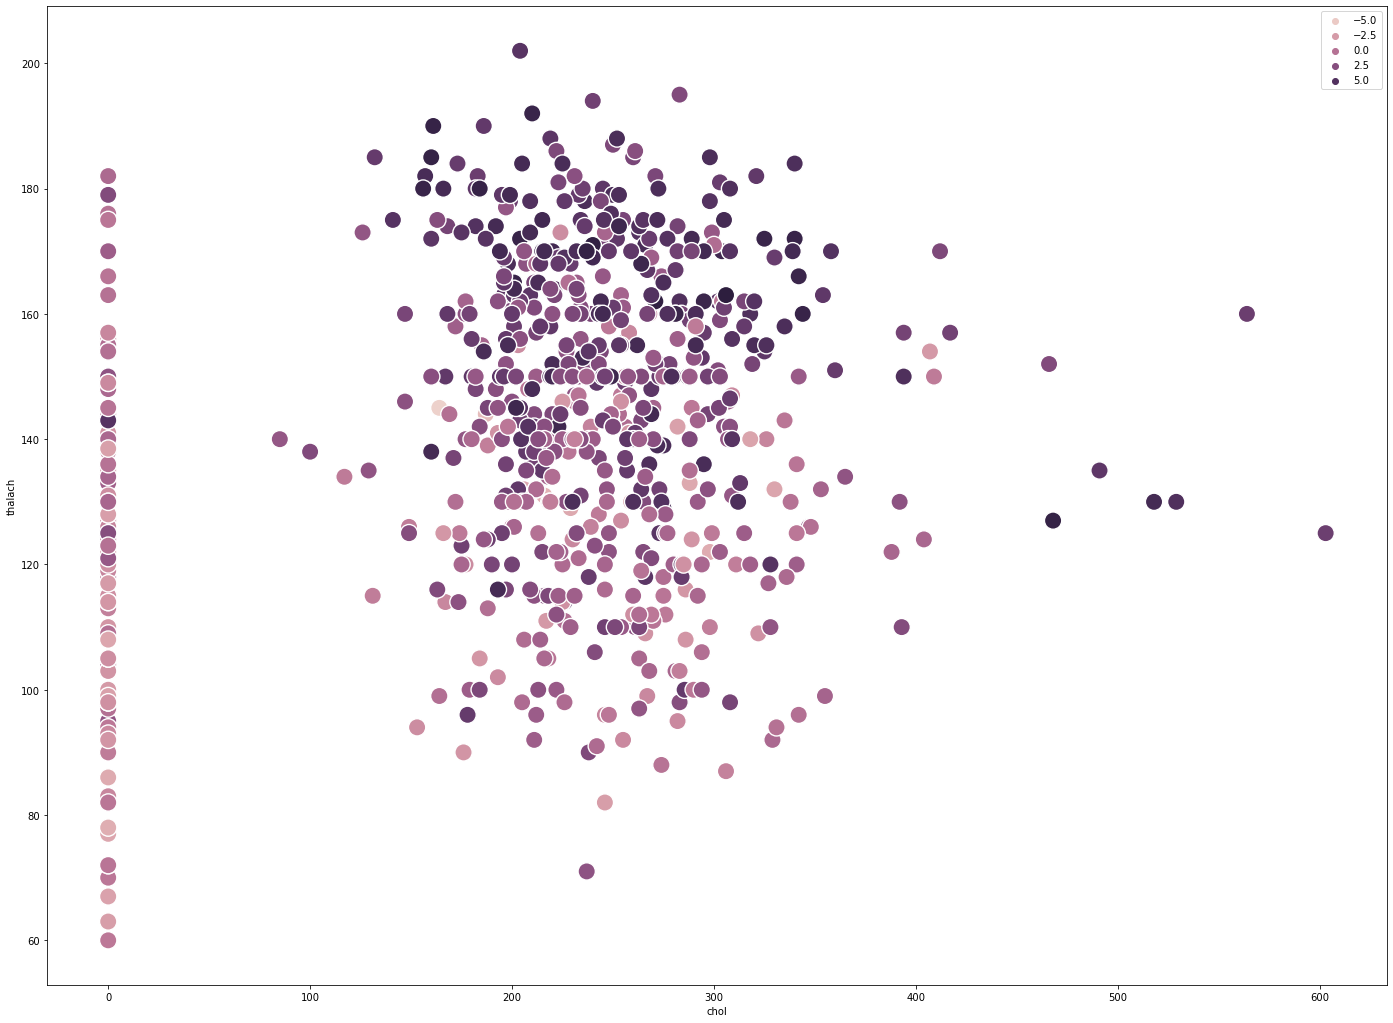

In [40]:
fig, ax = plt.subplots(1,1,figsize= (24,18))
sns.scatterplot(data = heart, x = 'chol', y = 'thalach', hue = Y_decision[:,0], s = 300);